# Python Project Spotify Salabert/Belleperche

We chose to realise the python project about the Top 50 of spotify's songs because we thought it could be interesting to understand what are their caracterisitcs and see if we can find any correlations. We are both interristed in music because we are currently play instruments and music is part of our life and hobbie. 

First of all, we found a dataset with the top 50 spotify songs of 2019

In [5]:
import pandas as pd 
#Importing panda to store the dataset in a dataframe and display it
spot = pd.read_csv("Spotify.csv",encoding='latin-1')
spot

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


As you can see, many parameters are defining a song, we chose at first to analyse the danceability and see if we can find any correlation(s) with the other paramters. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#We import those libraries to display schemas (plot) 

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
#We need those libraries for the linear regression

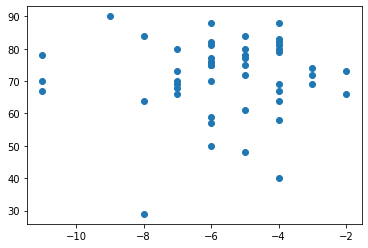

In [12]:
model = LinearRegression()
#Creating model for the regrression

x  = spot[['Loudness..dB..']]
y = spot['Danceability']

#Parameter is x so i user type
type(x)

#Fit is used to create a fitter model
model.fit(x ,y)
model.intercept_,model.coef_
plt.scatter(x,y)

We tried to found a correlation between Danceability and Loudness, but there is no correlation as you can see above ...
Sound power doesn't affect at all the danceability of a song.
So we decided to create a function to compare all the parameters with the danceability.

In [9]:
#There are no corealation so i try with combinaisons
def plotFeatures(col_list, title, output) : 
        plt.figure(figsize=(10, 14))
        i = 0
        print(len(col_list))
        for col in col_list:
            i+=1
            plt.subplot(7,2,i)
            plt.plot(spot[col], spot[output], marker="*",linestyle='none')
            plt.title(title % (col))
            plt.tight_layout()

In [10]:
col = spot.columns
col
#Getting all the columns name to use them as parameter of the function we just created

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

13


E:\Logiciels_efrei\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Logiciels_efrei\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Logiciels_efrei\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Logiciels_efrei\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


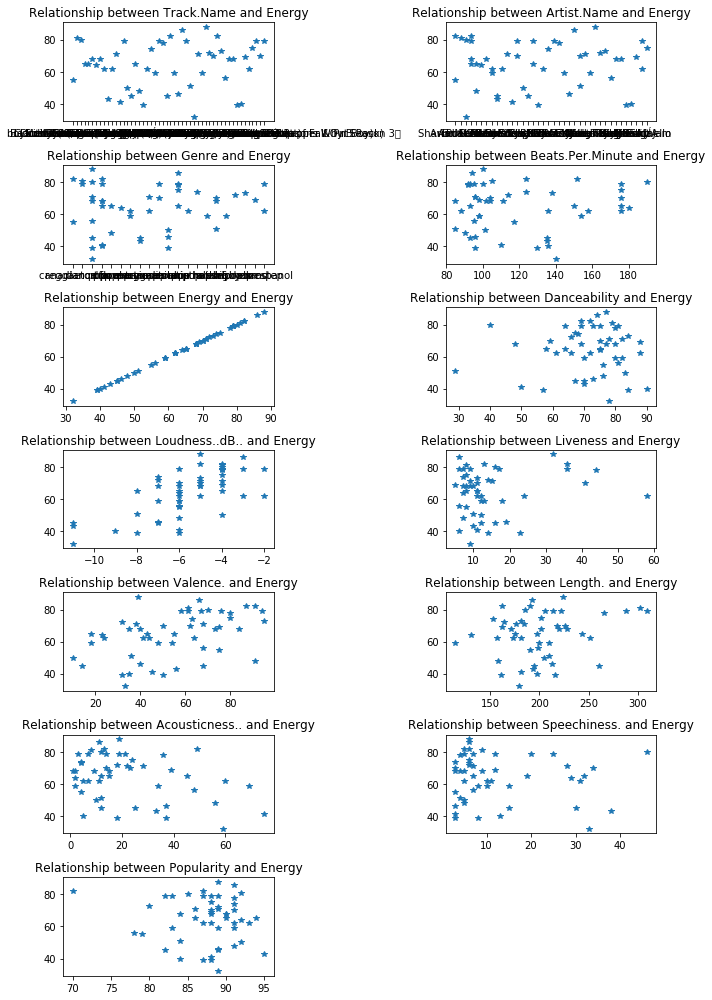

In [11]:
plotFeatures(col[1:], "Relationship between %s and Energy",'Energy')

To load the csv without any errors, we had to specify font (latin-1), that's the reason why we got few fonts errors.

We decided to use a heatmap to see the whole correlation between each parameters. 

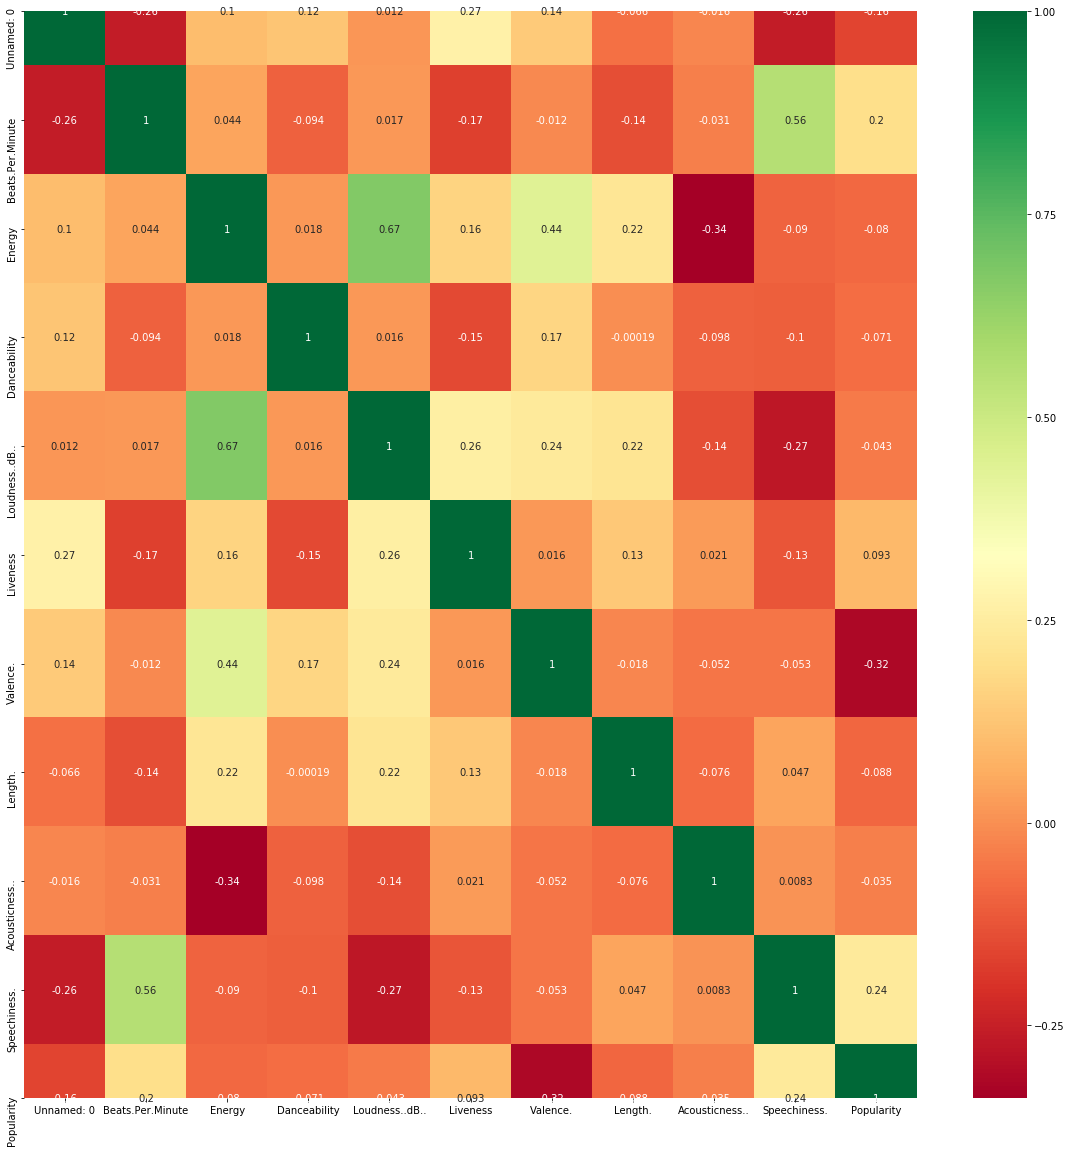

In [163]:
import seaborn as sns
corrmat = spot.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(spot[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [14]:
#We created a function to make linear regression between two parameters
def linreg(nm1, nm2):
    x  = spot[[nm1]]
    y = spot[nm2]

    #Parameter is x so i user type
    type(x)

    #Fit is used to create a fitter model
    model.fit(x ,y)
    model.intercept_,model.coef_
    plt.scatter(x,y)

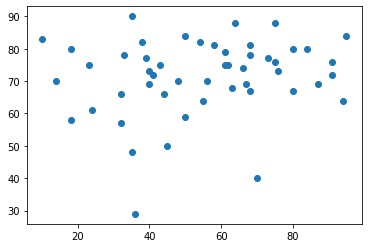

In [16]:
linreg("Valence.","Danceability")

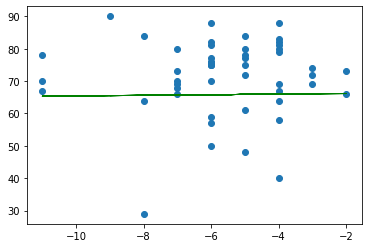

In [17]:
#Creating the linear equation to see the tendance and predict the futures values
x_matrice = x.values.reshape(-1,1)
plt.scatter(x,y)
eq = model.coef_*x_matrice+model.intercept_ #Equation de linearisation y = ax + b
drw = plt.plot(x,eq, lw = 1, c="green")
plt.show()


In [18]:
#Creating a new X matrix 
spot2 = spot[['Loudness..dB..','Valence.','Popularity','Length.']]
#y stays the same
#Then split my X matrix
X_train = spot2.iloc[:40]
X_test = spot2.iloc[40:]
#Then split y
Y_train = y.iloc[:40]
Y_test = y.iloc[40:]

#Create model
regr = linear_model.LinearRegression()

#train the model
regr.fit(X_train, Y_train)

#Make the Y prediction for the danceability of the song
Y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

#try to be the closest to ONE

Coefficients: 
 [0.20073062 0.08326485 0.03970472 0.0144658 ]
Mean squared error: 110.47
Coefficient of determination: -0.02


The results we got were not the one we expected. Indeed negative Coefficient of dertermination can be due to many factors : 
- The model is overfitted --> too many values fool the model and it cannot predicts as well as expected
- The model is underfitted --> the dataset is too poor so the we should take a bigger datasets so the model can train a bit more and make better prediction. Our dataset is only 50 rows long, so the coefficient might be due to this. 
- Too much elements in the X matrice (but this is not our problem, i tried to figure out differents solutions and try with differents entries and none fits ...)

    So, we found the top 50 songs of spotify in a range of 10 years in order to have better results. 

We found that danceability wasn't the best feature to test, so we decided to use Energy as output instead of Danceability.

In [19]:
spot = pd.read_csv("top10s.csv",encoding='latin-1')
#The column 'top genre','title' and 'artist' is causing problems for analisys so a deleted it
del spot['top genre']
del spot['title']
del spot['artist']
spot

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,2010,97,89,67,-4,8,80,217,19,4,83
1,2,2010,87,93,75,-5,52,64,263,24,23,82
2,3,2010,120,84,76,-3,29,71,200,10,14,80
3,4,2010,119,92,70,-4,8,71,295,0,4,79
4,5,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,2019,104,66,61,-7,20,16,176,1,3,75
599,600,2019,95,79,75,-6,7,61,206,21,12,75
600,601,2019,136,76,53,-5,9,65,260,7,34,70
601,602,2019,114,79,60,-6,42,24,217,1,7,69


Index(['Unnamed: 0', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop'],
      dtype='object')

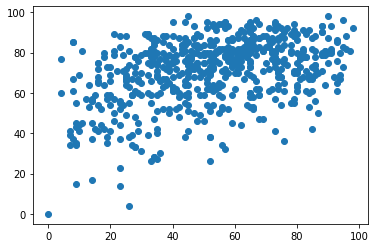

In [20]:
model = LinearRegression()
#Creating model for the regrression
x  = spot[['val']]
y = spot['nrgy']

#Parameter is x so i user type
type(x)

#Fit is used to create a fitter model
model.fit(x ,y)
model.intercept_,model.coef_
plt.scatter(x,y)

#Creating model for the regrression
col = spot.columns
col

12


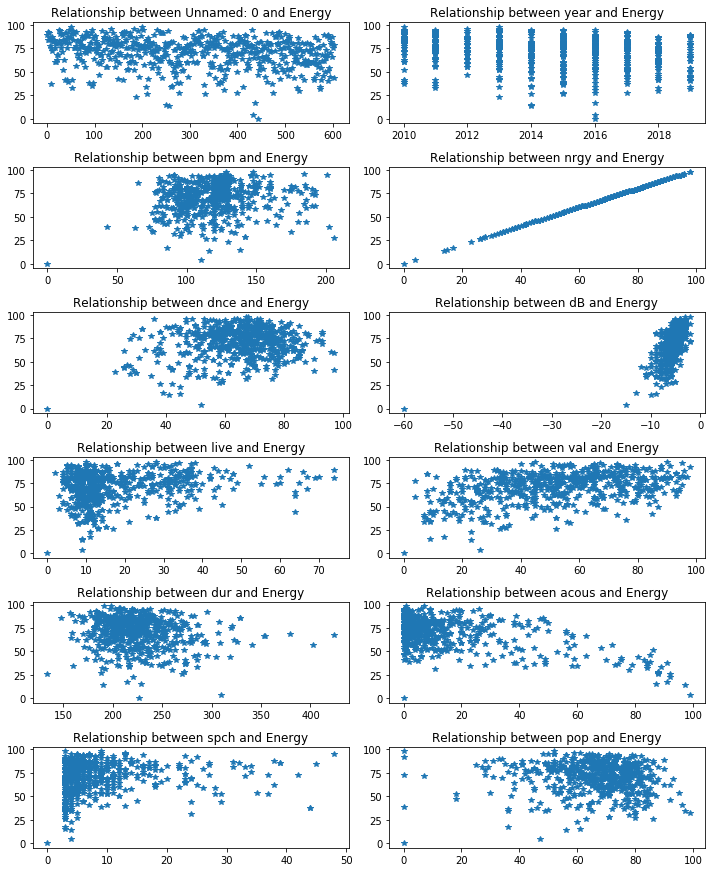

In [21]:

plotFeatures(col, "Relationship between %s and Energy",'nrgy')

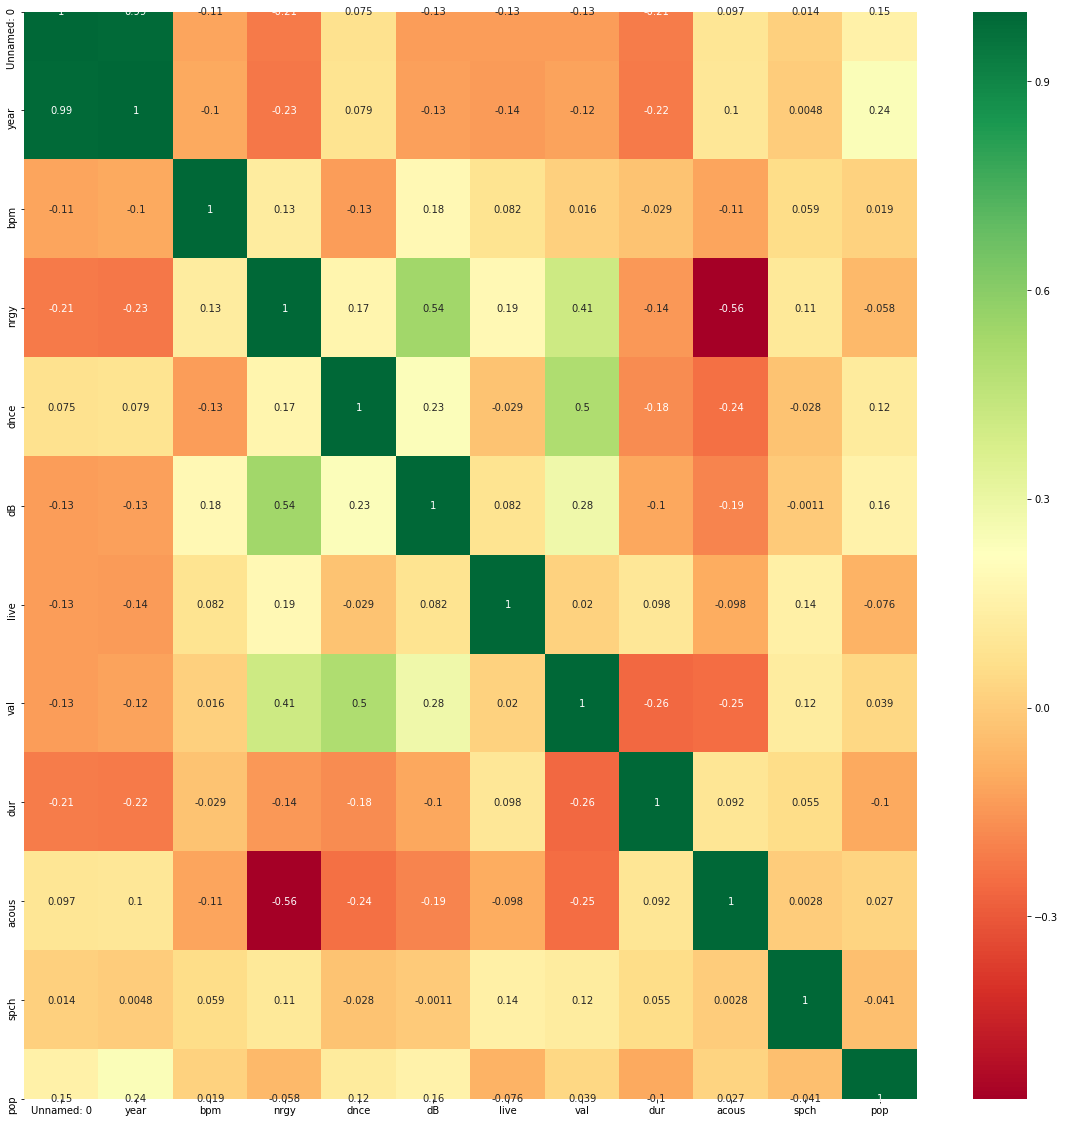

In [22]:
import seaborn as sns
corrmat = spot.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(spot[top_corr_features].corr(), annot=True, cmap="RdYlGn")

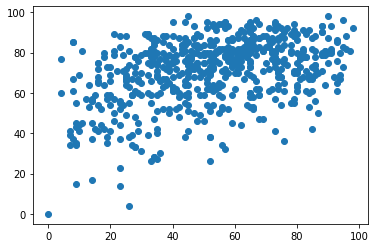

In [27]:
linreg("val","nrgy") #Valence (describes the musical positivness conveyd by a track : 
                     #music with high valence sounds more positive) seems to present one of the best correalation rate ...

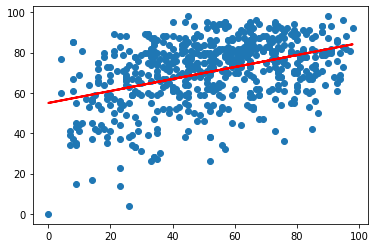

In [28]:
#Creating the linear equation to see the tendance and predict the futures values
x_matrice = x.values.reshape(-1,1)
plt.scatter(x,y)
eq = model.coef_*x_matrice+model.intercept_ #Equation de linearisation y = ax + b
drw = plt.plot(x,eq, lw = 2, c="red")
plt.show()

In [145]:
#Creating a new X matrix 
spot2 = spot[['val','dB','live','dnce','spch']]
#y changed the same
y = spot['nrgy']

#Then split my X matrix
X_train = spot2.iloc[:550]
X_test = spot2.iloc[550:]
#Then split y
Y_train = y.iloc[:550]
Y_test = y.iloc[550:]

#Create model
regr = linear_model.LinearRegression()

#train the model
regr.fit(X_train, Y_train)

#Make the Y prediction for the danceability of the song
Y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))


Coefficients: 
 [ 0.24273605  2.54994085  0.16886577 -0.12577076  0.08733465]
Mean squared error: 159.93
Coefficient of determination: 0.32


The best results we found is by combining the valence, dB, live, danceability and speechiness.
We know it's not enough we expected something like 0.5 or 0.7. 
We couldn't found better correlation between Energy and the other parameters.  

We are a bit disapointed because we thought that there were many correlations between the differents features which define a music.

